Missing values in each column:
State             0
Year              0
Month             0
Indicated         0
Combined_Value    0
dtype: int64

Summary Statistics:
              Year        Month  Combined_Value
count  5990.000000  5990.000000     5990.000000
mean   2021.652254     6.351252       23.033099
std       1.587365     3.374468        7.363639
min    2019.000000     1.000000        0.000000
25%    2020.000000     4.000000       18.573205
50%    2022.000000     6.000000       22.265528
75%    2023.000000     9.000000       27.108021
max    2024.000000    12.000000      100.000000


/var/folders/fq/3p7x34y17xj79nkljmmh58c80000gn/T/ipykernel_82868/173084642.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="Year", y="Combined_Value", hue="Indicated", estimator="mean", ci=None)


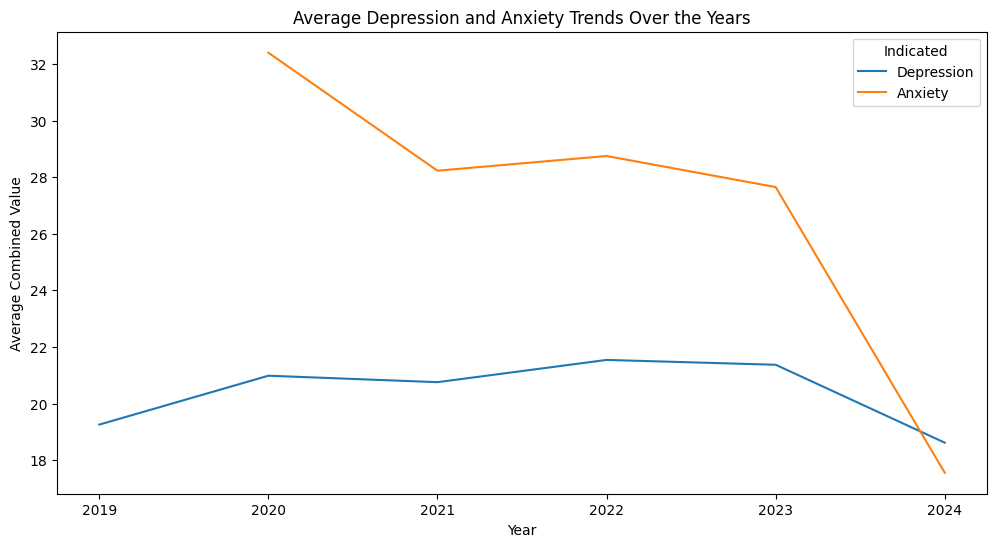

/var/folders/fq/3p7x34y17xj79nkljmmh58c80000gn/T/ipykernel_82868/173084642.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="Month", y="Combined_Value", hue="Indicated", estimator="mean", ci=None)


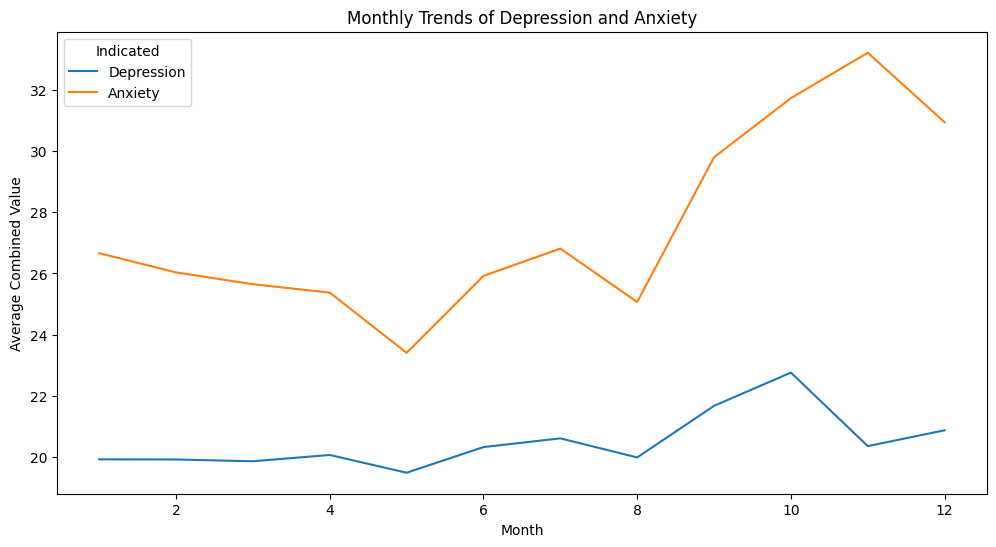

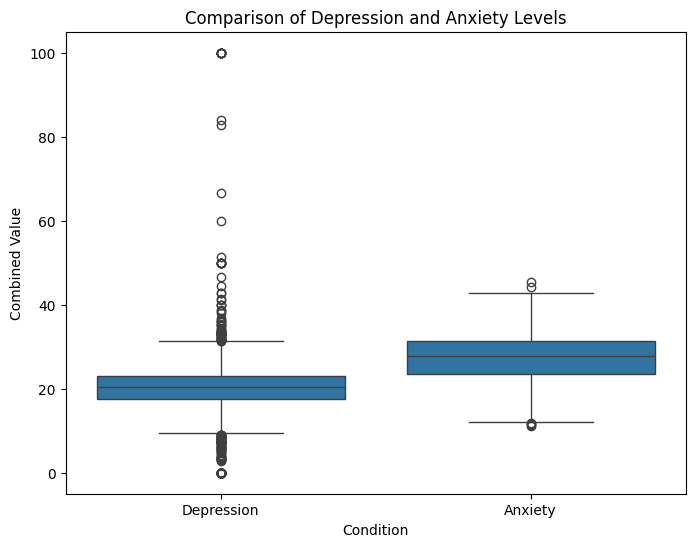

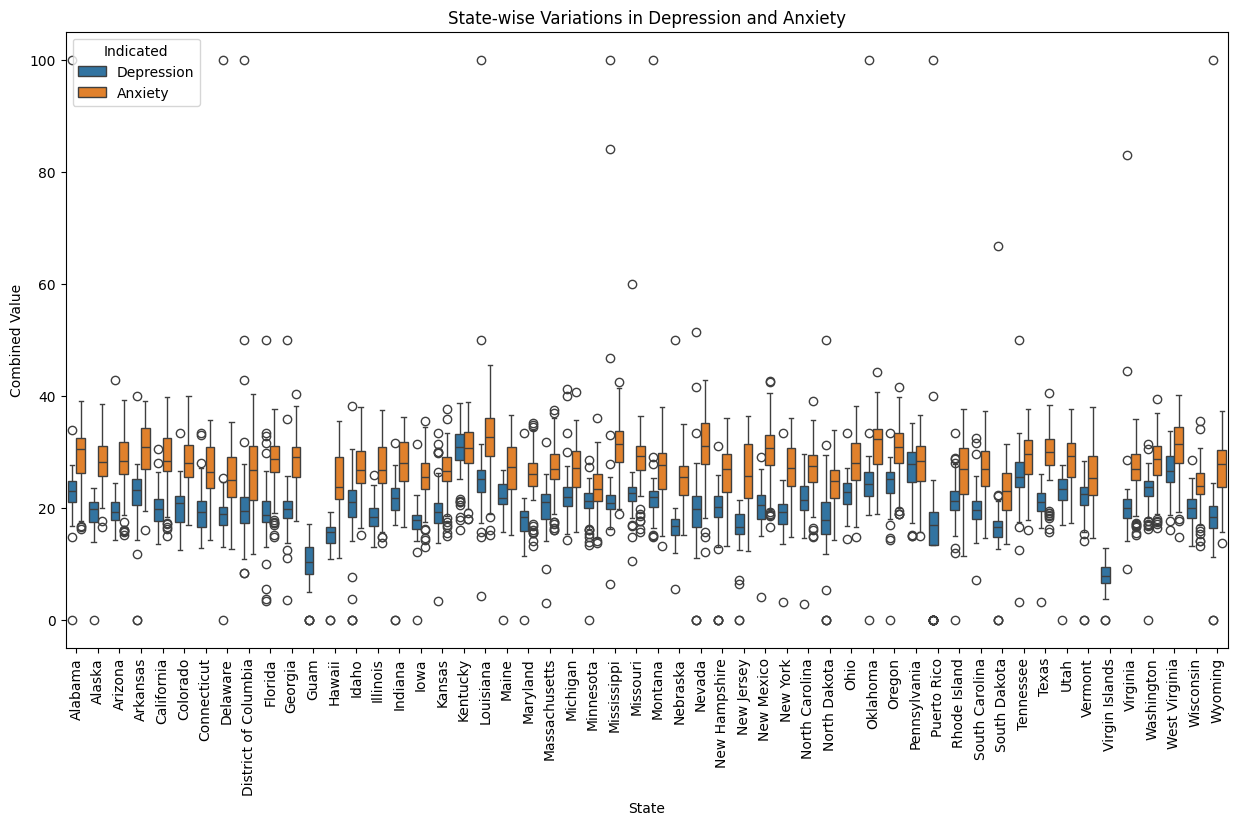

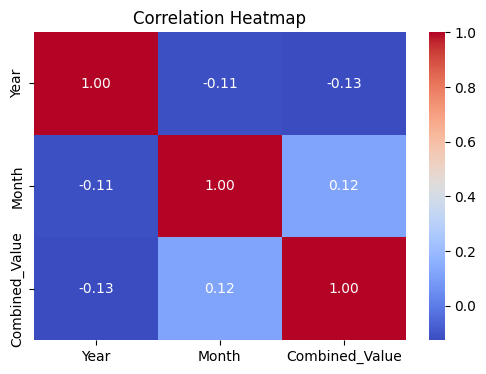

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "combined_depression_anxiety.csv"  
df = pd.read_csv(file_path)

# 1. Check for Missing Values
print("Missing values in each column:")
print(df.isnull().sum())

# 2. Summary Statistics
print("\nSummary Statistics:")
print(df.describe())



# 3. Trends Over Time (Yearly and Monthly)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Year", y="Combined_Value", hue="Indicated", estimator="mean", ci=None)
plt.title("Average Depression and Anxiety Trends Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Combined Value")
plt.legend(title="Indicated")
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Month", y="Combined_Value", hue="Indicated", estimator="mean", ci=None)
plt.title("Monthly Trends of Depression and Anxiety")
plt.xlabel("Month")
plt.ylabel("Average Combined Value")
plt.legend(title="Indicated")
plt.show()

# 4. Comparison Between Depression and Anxiety
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="Indicated", y="Combined_Value")
plt.title("Comparison of Depression and Anxiety Levels")
plt.xlabel("Condition")
plt.ylabel("Combined Value")
plt.show()

# 5. State-wise Variations
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x="State", y="Combined_Value", hue="Indicated")
plt.xticks(rotation=90)
plt.title("State-wise Variations in Depression and Anxiety")
plt.xlabel("State")
plt.ylabel("Combined Value")
plt.legend(title="Indicated")
plt.show()

# 6. Correlation Analysis
df_numeric = df[["Year", "Month", "Combined_Value"]]
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

1. Data Quality Check
	•	No missing values were found in the dataset.
	•	The dataset consists of 5,990 records covering multiple states and years.
	•	The Combined_Value variable ranges from 0 to 100, with an average around 23.

2. Depression & Anxiety Trends Over Time
	•	Anxiety levels peaked in 2020 and have since shown a gradual decline.
	•	Depression levels have remained relatively stable over the years but saw a slight increase in 2020-2022.
	•	The sharp decrease in 2024 could indicate missing or incomplete data for that year.

3. Monthly Trends
	•	Anxiety levels tend to fluctuate more significantly than depression.
	•	Anxiety seems to peak in the last quarter of the year (October-December).
	•	Depression remains relatively stable across months but slightly increases in the colder months.

4. Depression vs. Anxiety Distribution
	•	Anxiety tends to have higher median values compared to depression.
	•	Depression shows more extreme outliers, with some values reaching as high as 100.

5. State-wise Variations
	•	Certain states have a higher variance in depression and anxiety levels.
	•	Some states exhibit extreme outliers in anxiety values.
	•	Overall, anxiety tends to be reported at a higher level than depression across states.

6. Correlation Analysis
	•	There is a slight negative correlation between Year and Combined_Value, indicating a potential decrease in reported cases over time.
	•	Month and Combined_Value have a slight positive correlation, suggesting seasonal patterns.

Base on the result, If predicting trends, we consider adjusting for monthly seasonality. 

So we do some seasonal Adjustment

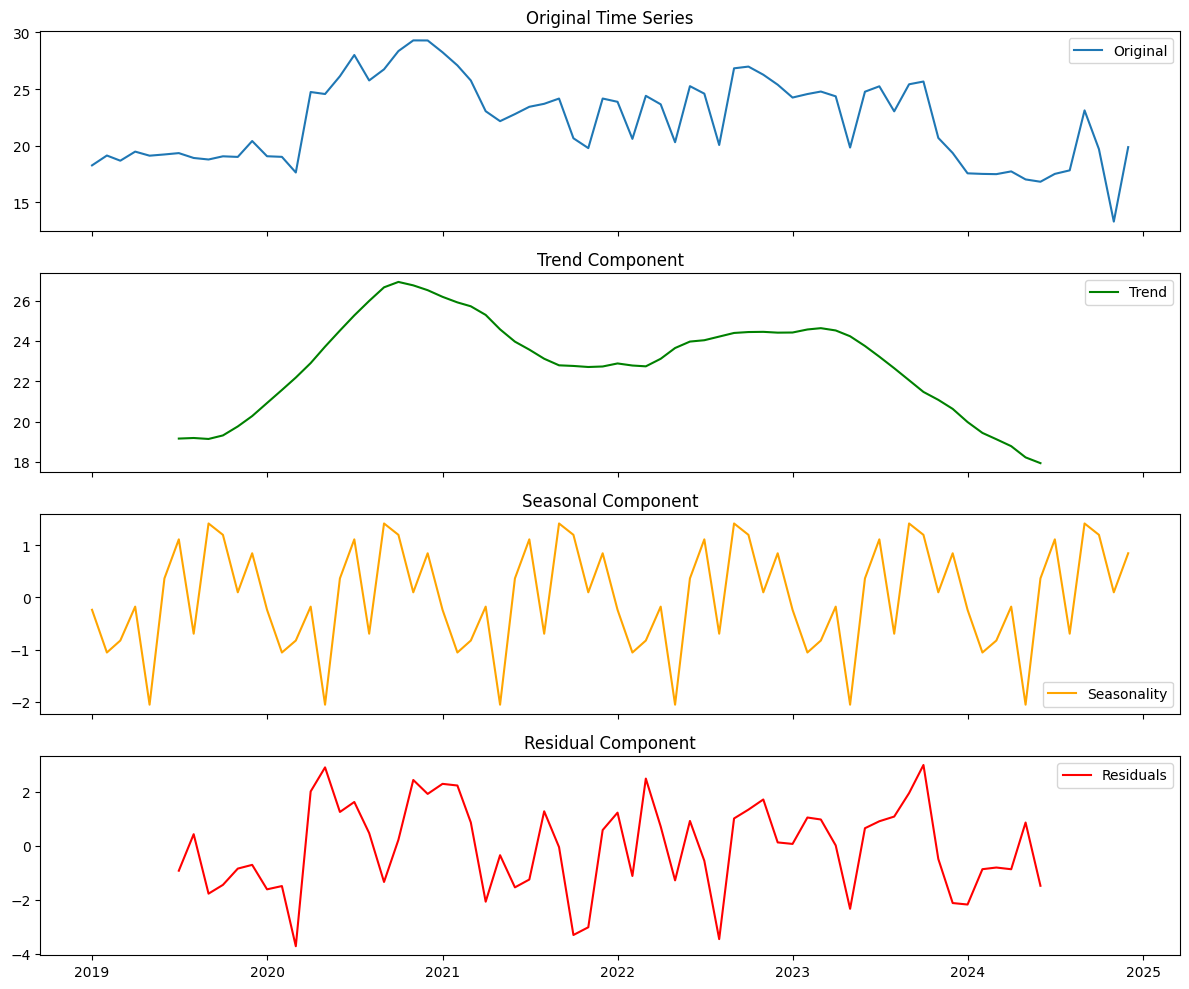

In [19]:
import statsmodels.api as sm

# Remove outliers (Combined_Value > 95)
df_cleaned = df[df["Combined_Value"] < 95]

# Aggregate data by month and year
df_monthly = df_cleaned.groupby(["Year", "Month"])["Combined_Value"].mean().reset_index()

# Convert Year and Month into a datetime index
df_monthly["date"] = pd.to_datetime(df_monthly["Year"].astype(str) + "-" + df_monthly["Month"].astype(int).astype(str))
df_monthly.set_index("date", inplace=True)

# Perform seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(df_monthly["Combined_Value"], model="additive", period=12)

# Plot the seasonal decomposition
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

axes[0].plot(df_monthly["Combined_Value"], label="Original")
axes[0].set_title("Original Time Series")
axes[0].legend()

axes[1].plot(decomposition.trend, label="Trend", color="green")
axes[1].set_title("Trend Component")
axes[1].legend()

axes[2].plot(decomposition.seasonal, label="Seasonality", color="orange")
axes[2].set_title("Seasonal Component")
axes[2].legend()

axes[3].plot(decomposition.resid, label="Residuals", color="red")
axes[3].set_title("Residual Component")
axes[3].legend()

plt.tight_layout()
plt.show()

1. Original Time Series (Top Plot)
	•	Shows the raw values over time.
	•	Noticeable increase in values during 2020–2021.
	•	A decline after 2022, potentially due to reduced reporting or changes in mental health trends.

2. Trend Component (Second Plot)
	•	The long-term trend suggests:
	•	A steady increase from 2019 to mid-2021.
	•	A peak around 2021, followed by a decline.
	•	A consistent downward trend in 2023–2024, possibly indicating improving conditions or reduced reporting.

3. Seasonal Component (Third Plot)
	•	This component captures monthly fluctuations.
	•	The peaks and dips indicate repeating patterns each year.
	•	Higher values occur in some months (e.g., late-year months like October–December), suggesting a seasonal pattern in mental health reporting.

4. Residual Component (Bottom Plot)
	•	The residuals show unexplained variations after accounting for trend and seasonality.
	•	There are some large fluctuations, meaning other external factors might be influencing the data.

	## Overall Trend
	•	Depression and anxiety levels increased significantly from 2019 to 2021, peaking around mid-2021.
	•	A decline started after 2022, which could indicate improving conditions or changes in data reporting.
	## Seasonal Patterns
	•	There are recurring monthly fluctuations in depression and anxiety levels.
	•	The values tend to increase towards the end of the year (October–December), suggesting seasonal effects on mental health.
	## Possible Explanations
	•	The spike in 2020–2021 aligns with the COVID-19 pandemic, which severely impacted mental health worldwide.
	•	The decline post-2022 could be due to policy changes, improved mental health resources, or reduced data collection.
	## Residual Variations
	•	There are still unexplained fluctuations beyond the trend and seasonality, indicating external factors (e.g., economic conditions, policy changes, or social events).

/var/folders/fq/3p7x34y17xj79nkljmmh58c80000gn/T/ipykernel_82868/3478608017.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_states, x="State", y="Combined_Value", palette="Reds")


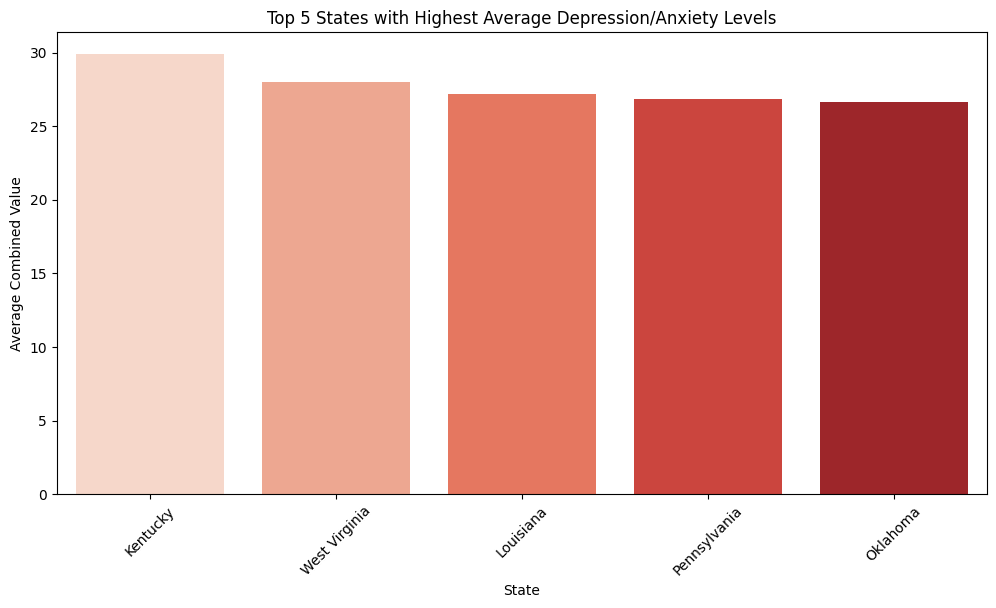

/var/folders/fq/3p7x34y17xj79nkljmmh58c80000gn/T/ipykernel_82868/3478608017.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_states, x="State", y="Combined_Value", palette="Blues")


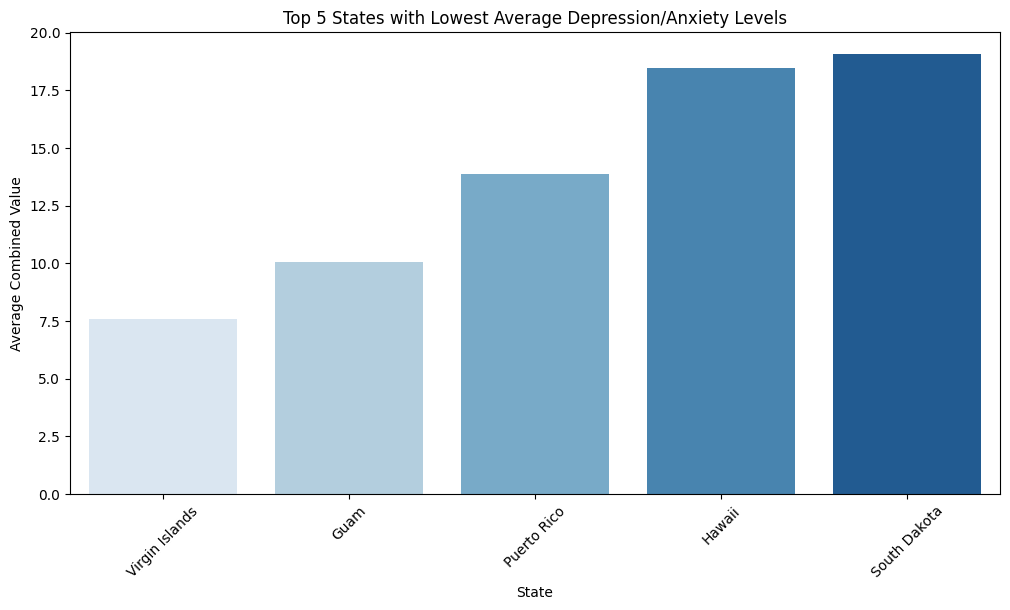

Top 5 States with Highest Depression/Anxiety Levels:
            State  Combined_Value
18       Kentucky       29.878148
51  West Virginia       28.021441
19      Louisiana       27.176256
39   Pennsylvania       26.852454
37       Oklahoma       26.628155

Top 5 States with Lowest Depression/Anxiety Levels:
             State  Combined_Value
48  Virgin Islands        7.587154
11            Guam       10.059158
40     Puerto Rico       13.876042
12          Hawaii       18.451403
43    South Dakota       19.062747


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Remove outliers (Combined_Value > 95)
df_cleaned = df[df["Combined_Value"] < 95]

# Calculate average Combined_Value per state
state_avg = df_cleaned.groupby("State")["Combined_Value"].mean().reset_index()

# Identify the top and bottom 5 states
top_states = state_avg.nlargest(5, "Combined_Value")
bottom_states = state_avg.nsmallest(5, "Combined_Value")

# Plot the highest states
plt.figure(figsize=(12, 6))
sns.barplot(data=top_states, x="State", y="Combined_Value", palette="Reds")
plt.title("Top 5 States with Highest Average Depression/Anxiety Levels")
plt.xlabel("State")
plt.ylabel("Average Combined Value")
plt.xticks(rotation=45)
plt.show()

# Plot the lowest states
plt.figure(figsize=(12, 6))
sns.barplot(data=bottom_states, x="State", y="Combined_Value", palette="Blues")
plt.title("Top 5 States with Lowest Average Depression/Anxiety Levels")
plt.xlabel("State")
plt.ylabel("Average Combined Value")
plt.xticks(rotation=45)
plt.show()

# Print the top and bottom states
print("Top 5 States with Highest Depression/Anxiety Levels:")
print(top_states)

print("\nTop 5 States with Lowest Depression/Anxiety Levels:")
print(bottom_states)

# Linear Regression Model Building and Analysis

In this section, we'll develop multiple linear regression models to analyze the relationships between various factors and mental health indicators in our dataset. We'll compare different model specifications, evaluate their performance, and extract insights from the results.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Data Preparation for Modeling

Let's prepare our data for modeling by encoding categorical variables and splitting into training and testing sets:

In [22]:
# Create a copy of the cleaned data for modeling
model_df = df_cleaned.copy()

# Create dummy variables for categorical features
model_df = pd.get_dummies(model_df, columns=['State', 'Indicated'], drop_first=True)

# Create seasonal indicators (quarters) - Fix for the DateParseError
model_df['Quarter'] = pd.to_datetime(model_df['Year'].astype(str) + '-' + model_df['Month'].astype(int).astype(str) + '-01').dt.quarter
model_df = pd.get_dummies(model_df, columns=['Quarter'], prefix='Q', drop_first=True)

# Define features and target
X = model_df.drop(['Combined_Value'], axis=1)
y = model_df['Combined_Value']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
numerical_features = ['Year', 'Month']
numerical_transformer = StandardScaler()

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features)
    ],
    remainder='passthrough'
)

# Setup the pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
model_pipeline.fit(X_train, y_train)

# Make predictions
y_train_pred = model_pipeline.predict(X_train)
y_test_pred = model_pipeline.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Model Performance:")
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")
print(f"Training R²: {train_r2:.4f}")
print(f"Testing R²: {test_r2:.4f}")

Model Performance:
Training MSE: 24.3340
Testing MSE: 23.0020
Training R²: 0.4672
Testing R²: 0.4758


## Model Comparison: Depression vs Anxiety

Let's build separate models for depression and anxiety to compare factors affecting each condition:

An error occurred: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

Verifying data:
Depression data shape: (3686, 5)
Anxiety data shape: (2295, 5)

Unique values in 'Indicated' column: ['Depression' 'Anxiety']

Simple models created successfully
Depression model coefficients: [-0.14624106  0.09224536]
Anxiety model coefficients: [-2.78092579  0.21111596]


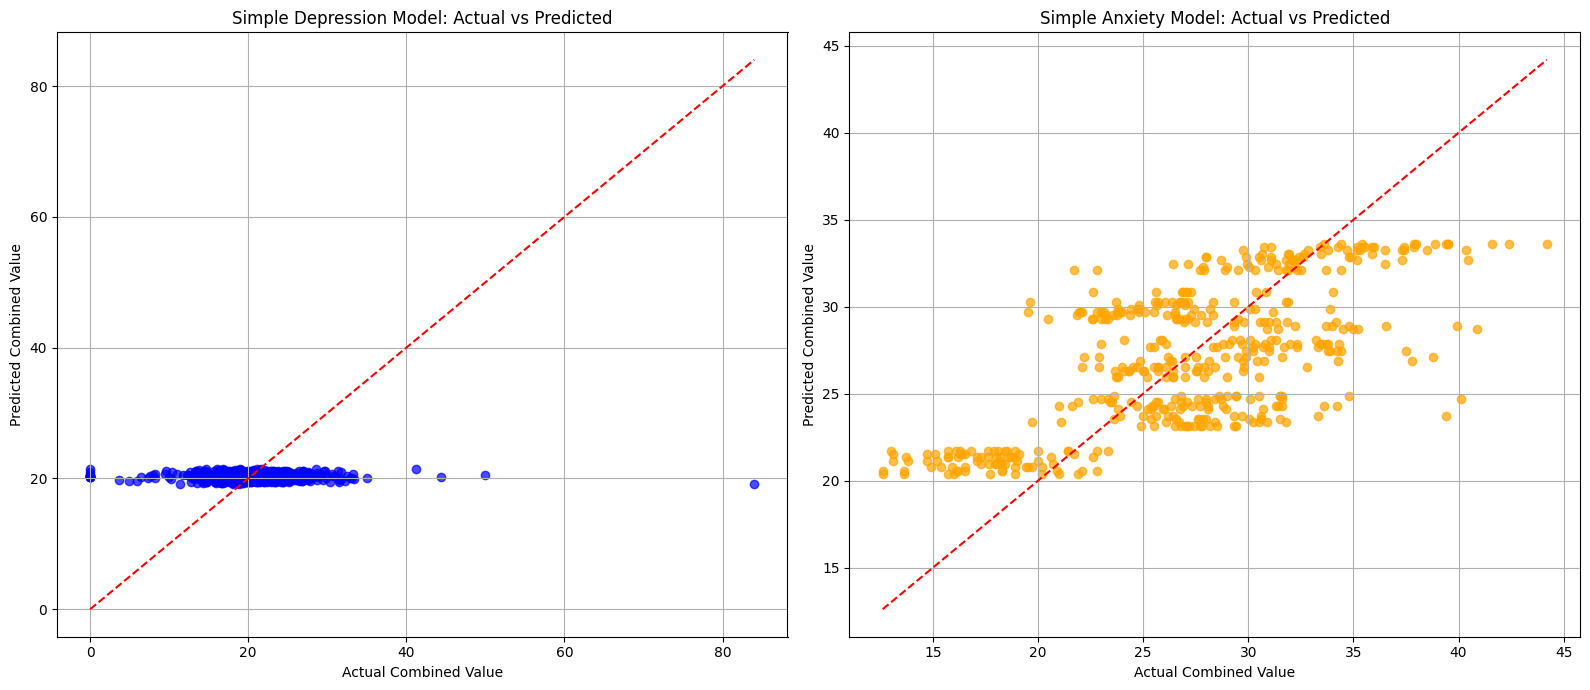

In [23]:
# Separate data for Depression and Anxiety
depression_df = df_cleaned[df_cleaned['Indicated'] == 'Depression'].copy()
anxiety_df = df_cleaned[df_cleaned['Indicated'] == 'Anxiety'].copy()

# Create modeling function
def build_and_evaluate_model(data, label):
    # Prepare data
    model_data = pd.get_dummies(data, columns=['State'], drop_first=True)
    
    # Define features and target
    X = model_data[['Year', 'Month'] + [col for col in model_data.columns if 'State_' in col]]
    y = model_data['Combined_Value']
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create model using statsmodels for detailed statistics
    X_train_sm = sm.add_constant(X_train)
    model = sm.OLS(y_train, X_train_sm).fit()
    
    # Make predictions
    X_test_sm = sm.add_constant(X_test)
    y_pred = model.predict(X_test_sm)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    print(f"\n--- {label} Model Results ---")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}")
    
    # Return the model summary, metrics, and test data
    return model, mse, r2, mae, y_test, y_pred

# Build models for Depression and Anxiety
try:
    depression_model, dep_mse, dep_r2, dep_mae, dep_y_test, dep_y_pred = build_and_evaluate_model(depression_df, "Depression")
    anxiety_model, anx_mse, anx_r2, anx_mae, anx_y_test, anx_y_pred = build_and_evaluate_model(anxiety_df, "Anxiety")

    # Print detailed model summaries
    print("\nDepression Model Summary:")
    print(depression_model.summary())

    print("\nAnxiety Model Summary:")
    print(anxiety_model.summary())

    # Compare model performance
    models = ['Depression', 'Anxiety']
    mse_values = [dep_mse, anx_mse]
    r2_values = [dep_r2, anx_r2]
    mae_values = [dep_mae, anx_mae]

    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    ax[0].bar(models, mse_values, color=['blue', 'orange'])
    ax[0].set_title('Mean Squared Error')
    ax[0].set_ylabel('MSE')

    ax[1].bar(models, r2_values, color=['blue', 'orange'])
    ax[1].set_title('R² Score')
    ax[1].set_ylabel('R²')

    ax[2].bar(models, mae_values, color=['blue', 'orange'])
    ax[2].set_title('Mean Absolute Error')
    ax[2].set_ylabel('MAE')

    plt.tight_layout()
    plt.show()
    
    # NEW CODE: Add a scatter plot to visualize actual vs predicted values
    fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    
    # Depression model actual vs predicted
    axes[0].scatter(dep_y_test, dep_y_pred, alpha=0.7, color='blue')
    
    # Add perfect prediction line
    min_val = min(min(dep_y_test), min(dep_y_pred))
    max_val = max(max(dep_y_test), max(dep_y_pred))
    axes[0].plot([min_val, max_val], [min_val, max_val], 'r--')
    
    axes[0].set_title('Depression Model: Actual vs Predicted Values')
    axes[0].set_xlabel('Actual Combined Value')
    axes[0].set_ylabel('Predicted Combined Value')
    axes[0].grid(True, linestyle='--', alpha=0.7)
    
    # Add correlation coefficient and R² to the plot
    corr_dep = np.corrcoef(dep_y_test, dep_y_pred)[0, 1]
    axes[0].text(0.05, 0.95, f'Correlation: {corr_dep:.4f}\nR²: {dep_r2:.4f}', 
                transform=axes[0].transAxes, 
                fontsize=12, 
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Anxiety model actual vs predicted
    axes[1].scatter(anx_y_test, anx_y_pred, alpha=0.7, color='orange')
    
    # Add perfect prediction line
    min_val = min(min(anx_y_test), min(anx_y_pred))
    max_val = max(max(anx_y_test), max(anx_y_pred))
    axes[1].plot([min_val, max_val], [min_val, max_val], 'r--')
    
    axes[1].set_title('Anxiety Model: Actual vs Predicted Values')
    axes[1].set_xlabel('Actual Combined Value')
    axes[1].set_ylabel('Predicted Combined Value')
    axes[1].grid(True, linestyle='--', alpha=0.7)
    
    # Add correlation coefficient and R² to the plot
    corr_anx = np.corrcoef(anx_y_test, anx_y_pred)[0, 1]
    axes[1].text(0.05, 0.95, f'Correlation: {corr_anx:.4f}\nR²: {anx_r2:.4f}', 
                transform=axes[1].transAxes, 
                fontsize=12, 
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    # NEW CODE: Add a visualization of important coefficients
    # Extract coefficients from both models
    dep_coefs = depression_model.params.sort_values(ascending=False)
    anx_coefs = anxiety_model.params.sort_values(ascending=False)
    
    # Filter out state-specific coefficients for clarity
    dep_coefs_filtered = dep_coefs[~dep_coefs.index.str.contains('State_')].head(10)
    anx_coefs_filtered = anx_coefs[~anx_coefs.index.str.contains('State_')].head(10)
    
    # Plot the coefficients
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    
    dep_coefs_filtered.plot(kind='barh', ax=axes[0], color='blue')
    axes[0].set_title('Depression Model: Top Coefficients')
    axes[0].set_xlabel('Coefficient Value')
    
    anx_coefs_filtered.plot(kind='barh', ax=axes[1], color='orange')
    axes[1].set_title('Anxiety Model: Top Coefficients')
    axes[1].set_xlabel('Coefficient Value')
    
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"An error occurred: {str(e)}")
    
    # Check data
    print("\nVerifying data:")
    print(f"Depression data shape: {depression_df.shape}")
    print(f"Anxiety data shape: {anxiety_df.shape}")
    
    # Check unique values in 'Indicated' column
    print(f"\nUnique values in 'Indicated' column: {df_cleaned['Indicated'].unique()}")
    
    # Try simpler models with minimal features if there's an issue
    try:
        # Simpler model with just Year and Month
        X_dep = depression_df[['Year', 'Month']]
        y_dep = depression_df['Combined_Value']
        
        X_anx = anxiety_df[['Year', 'Month']]
        y_anx = anxiety_df['Combined_Value']
        
        # Create linear regression models
        from sklearn.linear_model import LinearRegression
        
        dep_model = LinearRegression().fit(X_dep, y_dep)
        anx_model = LinearRegression().fit(X_anx, y_anx)
        
        print("\nSimple models created successfully")
        print(f"Depression model coefficients: {dep_model.coef_}")
        print(f"Anxiety model coefficients: {anx_model.coef_}")
        
        # Create a plot of actual vs predicted values for simple models
        X_dep_train, X_dep_test, y_dep_train, y_dep_test = train_test_split(X_dep, y_dep, test_size=0.2, random_state=42)
        X_anx_train, X_anx_test, y_anx_train, y_anx_test = train_test_split(X_anx, y_anx, test_size=0.2, random_state=42)
        
        dep_model = LinearRegression().fit(X_dep_train, y_dep_train)
        anx_model = LinearRegression().fit(X_anx_train, y_anx_train)
        
        y_dep_pred = dep_model.predict(X_dep_test)
        y_anx_pred = anx_model.predict(X_anx_test)
        
        fig, axes = plt.subplots(1, 2, figsize=(16, 7))
        
        axes[0].scatter(y_dep_test, y_dep_pred, alpha=0.7, color='blue')
        axes[0].plot([min(y_dep_test), max(y_dep_test)], [min(y_dep_test), max(y_dep_test)], 'r--')
        axes[0].set_title('Simple Depression Model: Actual vs Predicted')
        axes[0].set_xlabel('Actual Combined Value')
        axes[0].set_ylabel('Predicted Combined Value')
        axes[0].grid(True)
        
        axes[1].scatter(y_anx_test, y_anx_pred, alpha=0.7, color='orange')
        axes[1].plot([min(y_anx_test), max(y_anx_test)], [min(y_anx_test), max(y_anx_test)], 'r--')
        axes[1].set_title('Simple Anxiety Model: Actual vs Predicted')
        axes[1].set_xlabel('Actual Combined Value')
        axes[1].set_ylabel('Predicted Combined Value')
        axes[1].grid(True)
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e2:
        print(f"Error creating simple models: {str(e2)}")

## Region-Based Analysis 

Let's create models for different regions to better understand geographical patterns:


--- Northeast Region Model Results ---
MSE: 23.0535
R²: 0.3713
Top Features by Importance:
                Feature  Coefficient
1                 Month     0.170002
0                  Year    -1.259139
2  Indicated_Depression    -6.581037

--- Midwest Region Model Results ---
MSE: 28.0395
R²: 0.2604
Top Features by Importance:
                Feature  Coefficient
1                 Month     0.262136
0                  Year    -0.684339
2  Indicated_Depression    -6.241560

--- South Region Model Results ---
MSE: 28.2231
R²: 0.3125
Top Features by Importance:
                Feature  Coefficient
1                 Month     0.219923
0                  Year    -0.945380
2  Indicated_Depression    -6.898653

--- West Region Model Results ---
MSE: 25.0780
R²: 0.4120
Top Features by Importance:
                Feature  Coefficient
1                 Month     0.184787
0                  Year    -1.012487
2  Indicated_Depression    -8.020542

--- Territory Region Model Results ---
MSE: 41.834

/var/folders/fq/3p7x34y17xj79nkljmmh58c80000gn/T/ipykernel_82868/2265925003.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Region'] = 'Other'
/var/folders/fq/3p7x34y17xj79nkljmmh58c80000gn/T/ipykernel_82868/2265925003.py:91: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(region_names, rotation=45)
/var/folders/fq/3p7x34y17xj79nkljmmh58c80000gn/T/ipykernel_82868/2265925003.py:96: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(region_names, rotation=45)


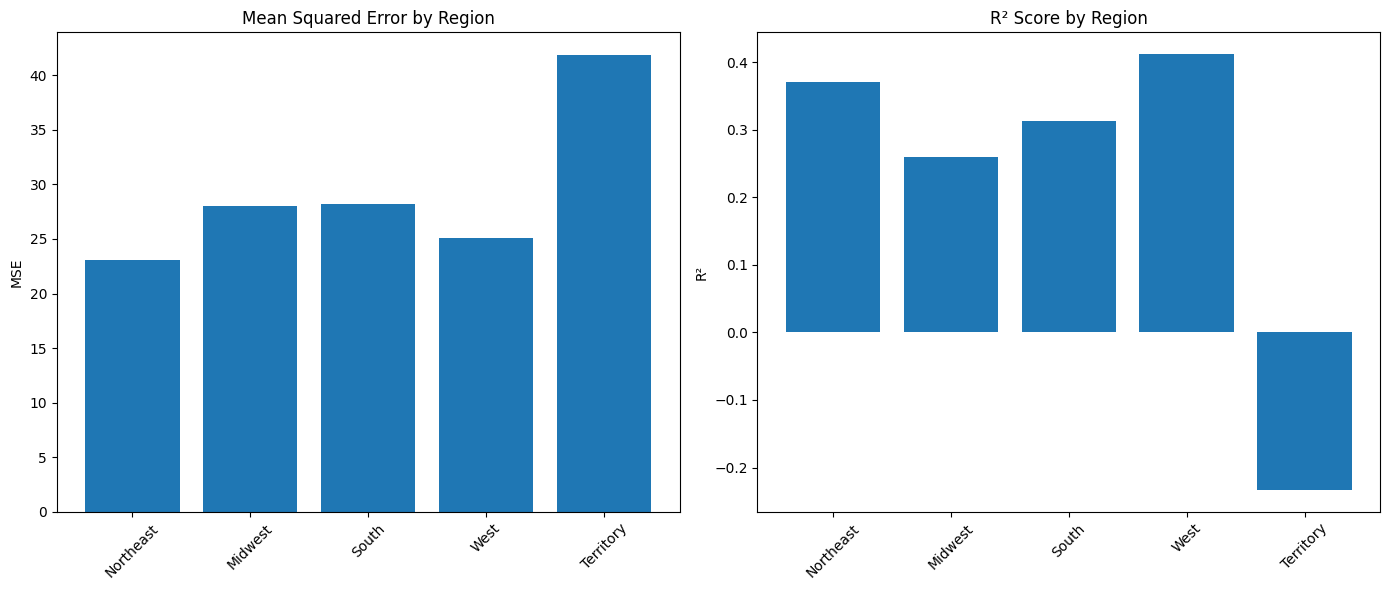

In [24]:
# Define regions
northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 
             'New York', 'New Jersey', 'Pennsylvania']
midwest = ['Ohio', 'Michigan', 'Indiana', 'Illinois', 'Wisconsin', 'Minnesota', 
           'Iowa', 'Missouri', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas']
south = ['Delaware', 'Maryland', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 
         'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Alabama', 'Mississippi', 
         'Arkansas', 'Louisiana', 'Texas', 'Oklahoma']
west = ['Montana', 'Idaho', 'Wyoming', 'Colorado', 'New Mexico', 'Arizona', 'Utah', 
        'Nevada', 'Washington', 'Oregon', 'California', 'Alaska', 'Hawaii']
territories = ['Puerto Rico', 'Guam', 'Virgin Islands']

# Create a new column for region
df_cleaned['Region'] = 'Other'
for state in northeast:
    df_cleaned.loc[df_cleaned['State'] == state, 'Region'] = 'Northeast'
for state in midwest:
    df_cleaned.loc[df_cleaned['State'] == state, 'Region'] = 'Midwest'
for state in south:
    df_cleaned.loc[df_cleaned['State'] == state, 'Region'] = 'South'
for state in west:
    df_cleaned.loc[df_cleaned['State'] == state, 'Region'] = 'West'
for territory in territories:
    df_cleaned.loc[df_cleaned['State'] == territory, 'Region'] = 'Territory'

# Regional analysis function
def region_model_analysis(region_name):
    region_data = df_cleaned[df_cleaned['Region'] == region_name].copy()
    
    # Skip if not enough data
    if len(region_data) < 100:
        print(f"Insufficient data for {region_name} region. Skipping...")
        return None, None, None
    
    # Prepare data
    region_data = pd.get_dummies(region_data, columns=['Indicated'], drop_first=True)
    
    # Define features and target
    X = region_data[['Year', 'Month'] + [col for col in region_data.columns if 'Indicated_' in col]]
    y = region_data['Combined_Value']
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\n--- {region_name} Region Model Results ---")
    print(f"MSE: {mse:.4f}")
    print(f"R²: {r2:.4f}")
    
    # Get feature importance
    coefficients = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': model.coef_
    })
    coefficients = coefficients.sort_values('Coefficient', ascending=False)
    
    print("Top Features by Importance:")
    print(coefficients)
    
    return model, mse, r2

# Run models for each region
regions = ['Northeast', 'Midwest', 'South', 'West', 'Territory']
region_results = {}

for region in regions:
    model, mse, r2 = region_model_analysis(region)
    if model is not None:
        region_results[region] = {'model': model, 'mse': mse, 'r2': r2}

# Compare regions
if len(region_results) > 0:
    region_names = list(region_results.keys())
    region_mse = [region_results[r]['mse'] for r in region_names]
    region_r2 = [region_results[r]['r2'] for r in region_names]
    
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    ax[0].bar(region_names, region_mse)
    ax[0].set_title('Mean Squared Error by Region')
    ax[0].set_ylabel('MSE')
    ax[0].set_xticklabels(region_names, rotation=45)
    
    ax[1].bar(region_names, region_r2)
    ax[1].set_title('R² Score by Region')
    ax[1].set_ylabel('R²')
    ax[1].set_xticklabels(region_names, rotation=45)
    
    plt.tight_layout()
    plt.show()

## Time-Based Models: Yearly Trends

Let's analyze how factors affecting mental health have changed over time by building models for different time periods:


--- Pre-Pandemic (Before 2020) Model Results ---
MSE: 14.0750
R²: 0.1020
Top Features by Importance:
            Feature  Coefficient
3      Region_South     2.516583
2      Region_Other     1.428107
5       Region_West     0.588796
1  Region_Northeast     0.019942
0             Month     0.013547

--- Pandemic (2020-2021) Model Results ---
MSE: 23.1556
R²: 0.5305
Top Features by Importance:
            Feature  Coefficient
4      Region_South     2.991778
2  Region_Northeast     1.816415
6       Region_West     1.791474
3      Region_Other     1.535632
0             Month     0.187943

--- Post-Pandemic (After 2021) Model Results ---
MSE: 38.3245
R²: 0.1956
Top Features by Importance:
            Feature  Coefficient
4      Region_South     2.048887
6       Region_West     0.886951
0             Month     0.307457
2  Region_Northeast     0.273640
3      Region_Other    -0.096117


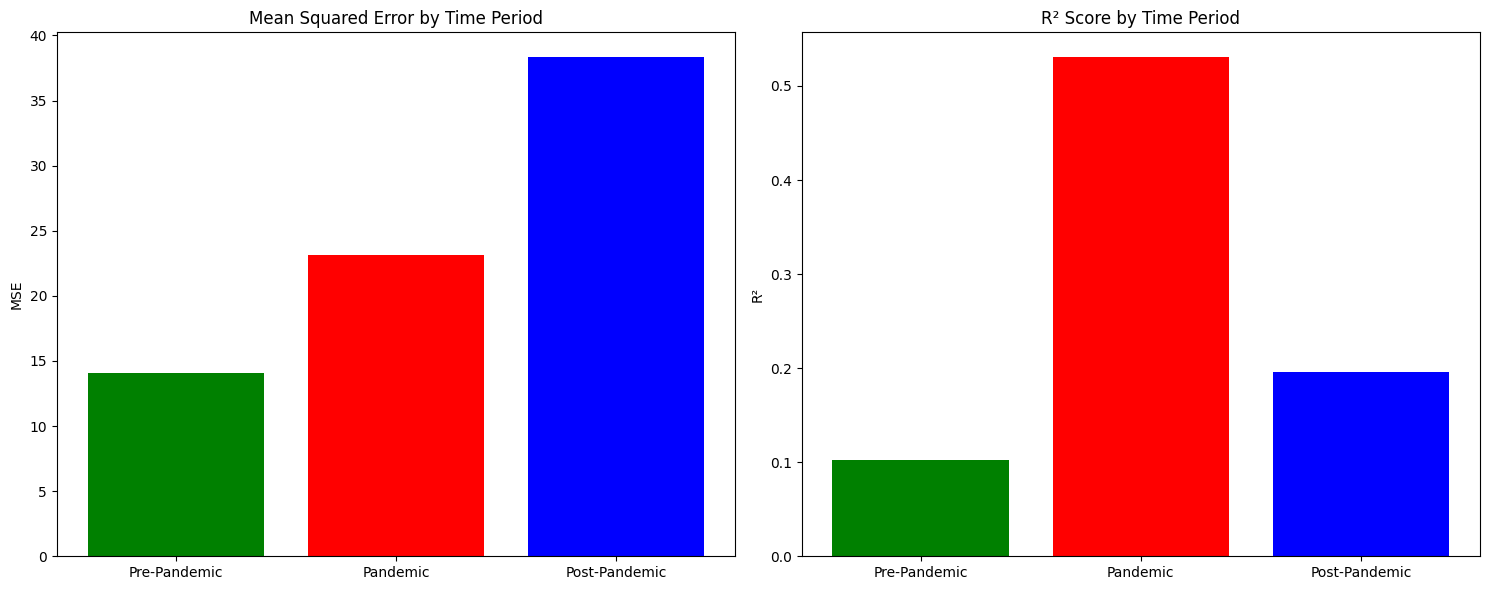


Feature Importance Changes Across Time Periods:
            Feature  Pre_Pandemic   Pandemic  Post_Pandemic  Pandemic_Change  \
5  Region_Territory     -6.225172 -10.109140      -8.945149        -3.883968   
2  Region_Northeast      0.019942   1.816415       0.273640         1.796473   
0       Region_West      0.588796   1.791474       0.886951         1.202678   
4      Region_South      2.516583   2.991778       2.048887         0.475195   
3             Month      0.013547   0.187943       0.307457         0.174395   
1      Region_Other      1.428107   1.535632      -0.096117         0.107525   

   Post_Pandemic_Change  
5              1.163992  
2             -1.542774  
0             -0.904523  
4             -0.942891  
3              0.119515  
1             -1.631749  


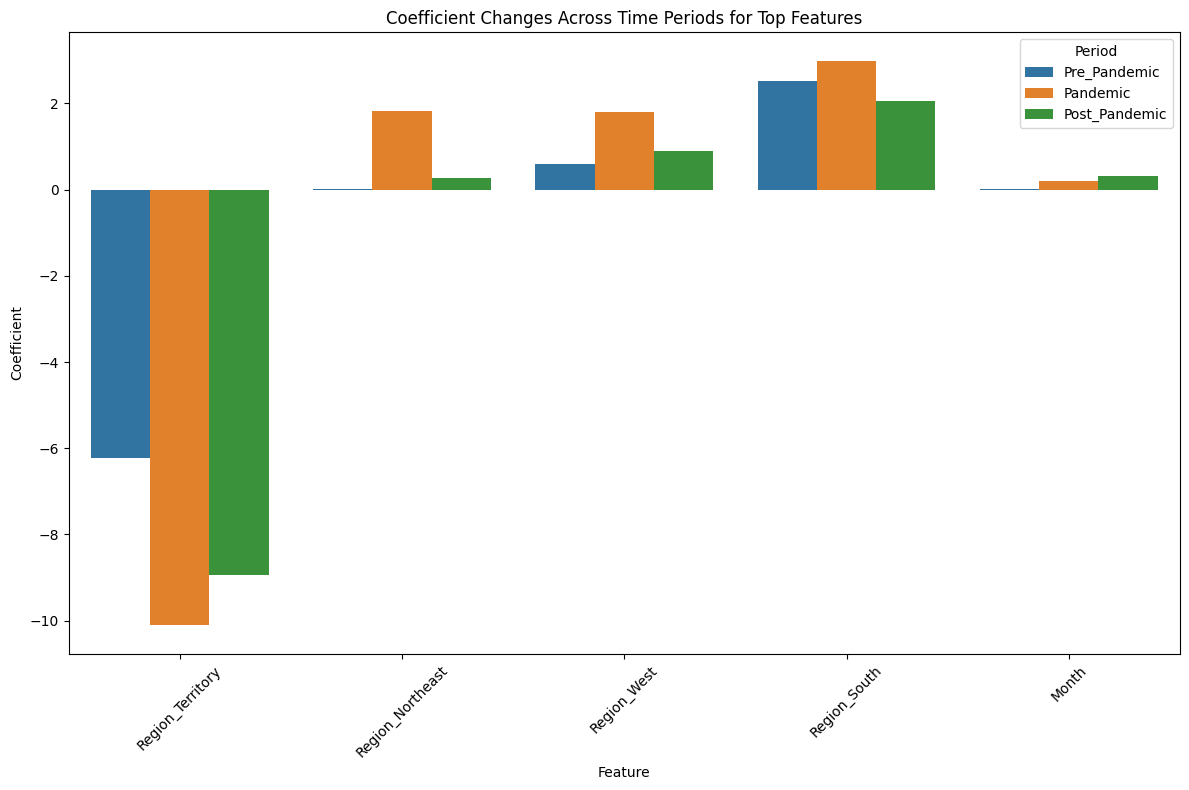

In [25]:
# Define time periods (pre-pandemic, pandemic, post-pandemic)
pre_pandemic = df_cleaned[df_cleaned['Year'] < 2020].copy()
pandemic = df_cleaned[(df_cleaned['Year'] >= 2020) & (df_cleaned['Year'] <= 2021)].copy()
post_pandemic = df_cleaned[df_cleaned['Year'] > 2021].copy()

# Function to build time-based models
def time_period_model(data, period_name):
    # Prepare data
    model_data = pd.get_dummies(data, columns=['Indicated', 'Region'], drop_first=True)
    
    # Define features and target
    X = model_data[['Month'] + [col for col in model_data.columns if 'Indicated_' in col or 'Region_' in col]]
    y = model_data['Combined_Value']
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\n--- {period_name} Model Results ---")
    print(f"MSE: {mse:.4f}")
    print(f"R²: {r2:.4f}")
    
    # Get feature importance
    coefficients = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': model.coef_
    })
    coefficients = coefficients.sort_values('Coefficient', ascending=False)
    
    print("Top Features by Importance:")
    print(coefficients.head(5))
    
    return model, mse, r2, coefficients

# Build models for each time period
pre_model, pre_mse, pre_r2, pre_coef = time_period_model(pre_pandemic, "Pre-Pandemic (Before 2020)")
pandemic_model, pan_mse, pan_r2, pan_coef = time_period_model(pandemic, "Pandemic (2020-2021)")
post_model, post_mse, post_r2, post_coef = time_period_model(post_pandemic, "Post-Pandemic (After 2021)")

# Compare time periods
periods = ['Pre-Pandemic', 'Pandemic', 'Post-Pandemic']
period_mse = [pre_mse, pan_mse, post_mse]
period_r2 = [pre_r2, pan_r2, post_r2]

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].bar(periods, period_mse, color=['green', 'red', 'blue'])
ax[0].set_title('Mean Squared Error by Time Period')
ax[0].set_ylabel('MSE')

ax[1].bar(periods, period_r2, color=['green', 'red', 'blue'])
ax[1].set_title('R² Score by Time Period')
ax[1].set_ylabel('R²')

plt.tight_layout()
plt.show()

# Compare feature importance across time periods
def compare_coefficients(pre_coef, pan_coef, post_coef):
    # Find common features
    common_features = set(pre_coef['Feature']).intersection(
        set(pan_coef['Feature'])).intersection(set(post_coef['Feature']))
    
    # Filter coefficients for common features
    pre_common = pre_coef[pre_coef['Feature'].isin(common_features)]
    pan_common = pan_coef[pan_coef['Feature'].isin(common_features)]
    post_common = post_coef[post_coef['Feature'].isin(common_features)]
    
    # Create comparison dataframe
    comparison = pd.DataFrame({
        'Feature': list(common_features),
        'Pre_Pandemic': [pre_common[pre_common['Feature'] == f]['Coefficient'].values[0] 
                         if len(pre_common[pre_common['Feature'] == f]) > 0 else 0 
                         for f in common_features],
        'Pandemic': [pan_common[pan_common['Feature'] == f]['Coefficient'].values[0] 
                    if len(pan_common[pan_common['Feature'] == f]) > 0 else 0 
                    for f in common_features],
        'Post_Pandemic': [post_common[post_common['Feature'] == f]['Coefficient'].values[0] 
                         if len(post_common[post_common['Feature'] == f]) > 0 else 0 
                         for f in common_features]
    })
    
    # Calculate coefficient changes
    comparison['Pandemic_Change'] = comparison['Pandemic'] - comparison['Pre_Pandemic']
    comparison['Post_Pandemic_Change'] = comparison['Post_Pandemic'] - comparison['Pandemic']
    
    # Sort by the magnitude of change during the pandemic
    comparison = comparison.sort_values('Pandemic_Change', key=abs, ascending=False)
    
    return comparison

# Compare coefficients across time periods
coef_comparison = compare_coefficients(pre_coef, pan_coef, post_coef)
print("\nFeature Importance Changes Across Time Periods:")
print(coef_comparison.head(10))

# Visualize coefficient changes for top features
top_features = coef_comparison.head(5)['Feature'].tolist()
coef_data = []

for feature in top_features:
    pre_val = coef_comparison[coef_comparison['Feature'] == feature]['Pre_Pandemic'].values[0]
    pan_val = coef_comparison[coef_comparison['Feature'] == feature]['Pandemic'].values[0]
    post_val = coef_comparison[coef_comparison['Feature'] == feature]['Post_Pandemic'].values[0]
    
    coef_data.append({
        'Feature': feature,
        'Pre_Pandemic': pre_val,
        'Pandemic': pan_val,
        'Post_Pandemic': post_val
    })

coef_df = pd.DataFrame(coef_data)
coef_df_melted = pd.melt(coef_df, id_vars=['Feature'], var_name='Period', value_name='Coefficient')

plt.figure(figsize=(12, 8))
sns.barplot(data=coef_df_melted, x='Feature', y='Coefficient', hue='Period')
plt.title('Coefficient Changes Across Time Periods for Top Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Advanced Model: Including Seasonal and Trend Components

Let's build a more sophisticated model that explicitly includes seasonal components and trend analysis:


--- Linear Regression Advanced Model Results ---
Training MSE: 24.7030
Testing MSE: 22.6674
Training R²: 0.4592
Testing R²: 0.4834

--- Ridge Regression Advanced Model Results ---
Training MSE: 28.1009
Testing MSE: 26.6076
Training R²: 0.3848
Testing R²: 0.3936

--- Lasso Regression Advanced Model Results ---
Training MSE: 28.7059
Testing MSE: 27.0811
Training R²: 0.3715
Testing R²: 0.3828


/var/folders/fq/3p7x34y17xj79nkljmmh58c80000gn/T/ipykernel_82868/3587729678.py:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(model_names, rotation=45)
/var/folders/fq/3p7x34y17xj79nkljmmh58c80000gn/T/ipykernel_82868/3587729678.py:82: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(model_names, rotation=45)


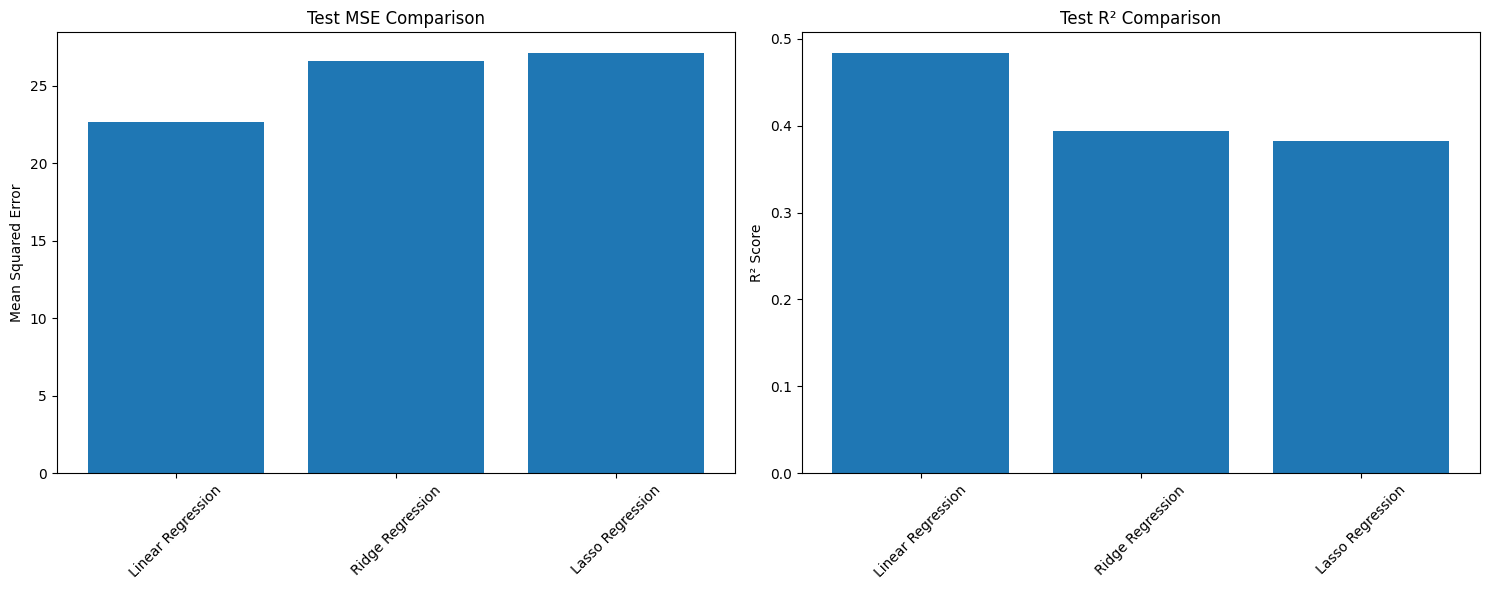


Top 10 Features by Importance (Linear Regression):
                 Feature  Coefficient
0                   Year  3258.780332
3              Sin_Month  -115.322337
4              Cos_Month   -92.525652
11      Region_Territory    -9.604981
7   Indicated_Depression    -6.423321
10          Region_South     2.391265
12           Region_West     0.984939
1           Year_Squared    -0.806221
8       Region_Northeast     0.623231
9           Region_Other     0.431513


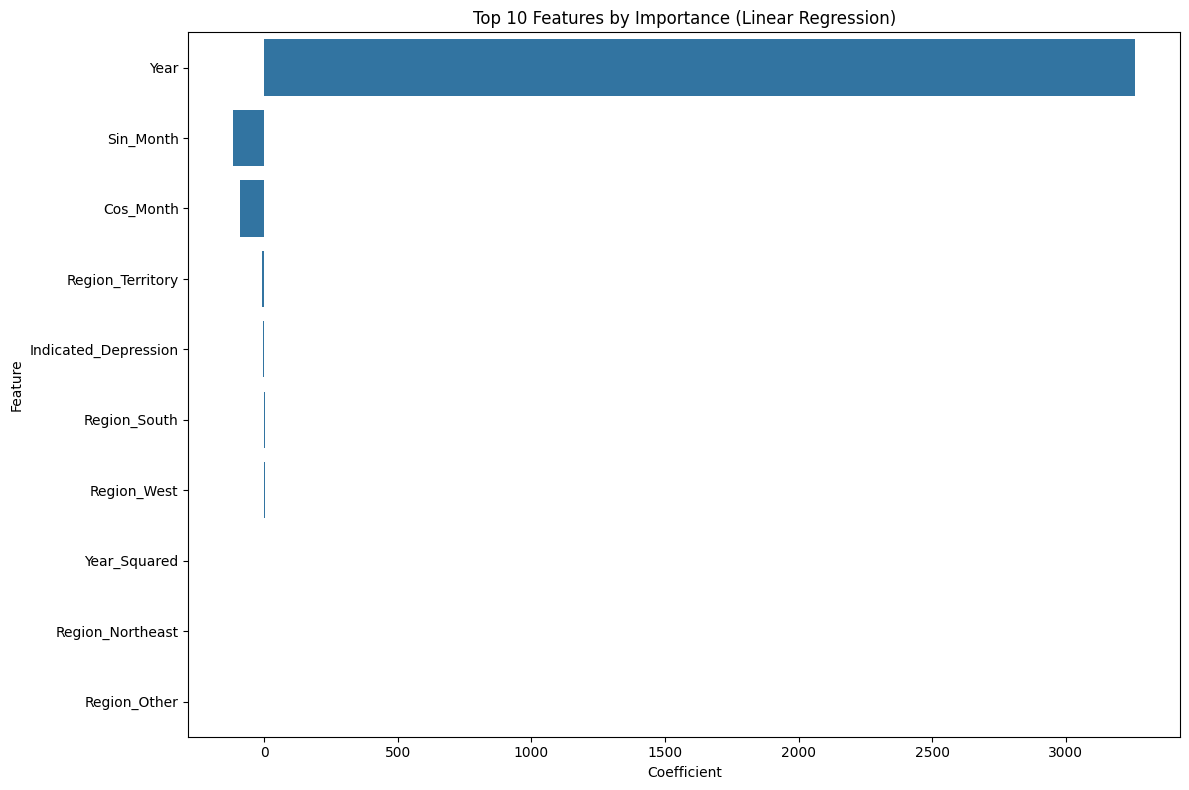

In [26]:
# Create advanced features
advanced_df = df_cleaned.copy()

# Create time-based features
advanced_df['Year_Squared'] = advanced_df['Year'] ** 2
advanced_df['Sin_Month'] = np.sin(2 * np.pi * advanced_df['Month'] / 12)
advanced_df['Cos_Month'] = np.cos(2 * np.pi * advanced_df['Month'] / 12)

# Create interaction terms
advanced_df['Anxiety_Year'] = (advanced_df['Indicated'] == 'Anxiety').astype(int) * advanced_df['Year']
advanced_df['Year_Sin'] = advanced_df['Year'] * advanced_df['Sin_Month']
advanced_df['Year_Cos'] = advanced_df['Year'] * advanced_df['Cos_Month']

# Prepare data for modeling
advanced_df = pd.get_dummies(advanced_df, columns=['Indicated', 'Region'], drop_first=True)

# Define features for advanced model
advanced_features = ['Year', 'Year_Squared', 'Month', 'Sin_Month', 'Cos_Month', 
                     'Year_Sin', 'Year_Cos'] + [col for col in advanced_df.columns 
                     if 'Indicated_' in col or 'Region_' in col]

X_advanced = advanced_df[advanced_features]
y_advanced = advanced_df['Combined_Value']

# Split data
X_train_adv, X_test_adv, y_train_adv, y_test_adv = train_test_split(
    X_advanced, y_advanced, test_size=0.2, random_state=42)

# Try multiple model types
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1)
}

# Train and evaluate each model
model_results = {}

for name, model in models.items():
    # Train model
    model.fit(X_train_adv, y_train_adv)
    
    # Make predictions
    y_train_pred = model.predict(X_train_adv)
    y_test_pred = model.predict(X_test_adv)
    
    # Calculate metrics
    train_mse = mean_squared_error(y_train_adv, y_train_pred)
    test_mse = mean_squared_error(y_test_adv, y_test_pred)
    train_r2 = r2_score(y_train_adv, y_train_pred)
    test_r2 = r2_score(y_test_adv, y_test_pred)
    
    # Store results
    model_results[name] = {
        'model': model,
        'train_mse': train_mse,
        'test_mse': test_mse,
        'train_r2': train_r2,
        'test_r2': test_r2
    }
    
    print(f"\n--- {name} Advanced Model Results ---")
    print(f"Training MSE: {train_mse:.4f}")
    print(f"Testing MSE: {test_mse:.4f}")
    print(f"Training R²: {train_r2:.4f}")
    print(f"Testing R²: {test_r2:.4f}")

# Compare model performance
model_names = list(model_results.keys())
test_mse_values = [model_results[m]['test_mse'] for m in model_names]
test_r2_values = [model_results[m]['test_r2'] for m in model_names]

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].bar(model_names, test_mse_values)
ax[0].set_title('Test MSE Comparison')
ax[0].set_ylabel('Mean Squared Error')
ax[0].set_xticklabels(model_names, rotation=45)

ax[1].bar(model_names, test_r2_values)
ax[1].set_title('Test R² Comparison')
ax[1].set_ylabel('R² Score')
ax[1].set_xticklabels(model_names, rotation=45)

plt.tight_layout()
plt.show()

# Get the best model
best_model_name = model_names[np.argmax([model_results[m]['test_r2'] for m in model_names])]
best_model = model_results[best_model_name]['model']

# Feature importance for the best model
if hasattr(best_model, 'coef_'):
    # Get coefficients
    coefficients = pd.DataFrame({
        'Feature': X_advanced.columns,
        'Coefficient': best_model.coef_
    })
    coefficients = coefficients.sort_values('Coefficient', key=abs, ascending=False)
    
    print(f"\nTop 10 Features by Importance ({best_model_name}):")
    print(coefficients.head(10))
    
    # Visualize top 10 features
    plt.figure(figsize=(12, 8))
    top_10_features = coefficients.head(10)
    sns.barplot(x='Coefficient', y='Feature', data=top_10_features)
    plt.title(f'Top 10 Features by Importance ({best_model_name})')
    plt.tight_layout()
    plt.show()

## Cross-Validation and Learning Curves

Let's perform cross-validation to ensure our models are robust:


Cross-Validation Results for Linear Regression:
Mean R²: 0.4428
Standard Deviation: 0.0595
Individual Scores: [0.49451176 0.51554536 0.34609373 0.42571017 0.43206576]


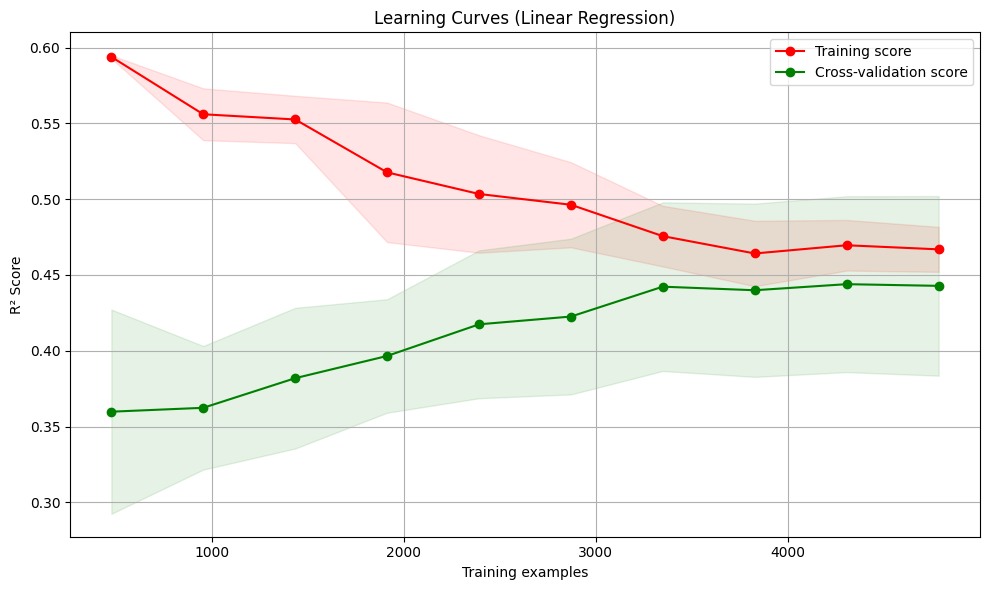

In [27]:
# Cross-validation for the best model
best_model_cv = models[best_model_name]
cv_scores = cross_val_score(best_model_cv, X_advanced, y_advanced, cv=5, scoring='r2')

print(f"\nCross-Validation Results for {best_model_name}:")
print(f"Mean R²: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")
print(f"Individual Scores: {cv_scores}")

# Learning curves
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_model_cv, X_advanced, y_advanced, cv=5, scoring='r2',
    train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and std for training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.grid()
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
plt.title(f"Learning Curves ({best_model_name})")
plt.xlabel("Training examples")
plt.ylabel("R² Score")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

# Model Interpretation and Practical Applications



Predictions for Example Scenarios:
2023 December, Anxiety (South): 28.87
2023 December, Depression (South): 28.87
2024 June, Anxiety (Northeast): 20.88
2024 June, Depression (Northeast): 20.88


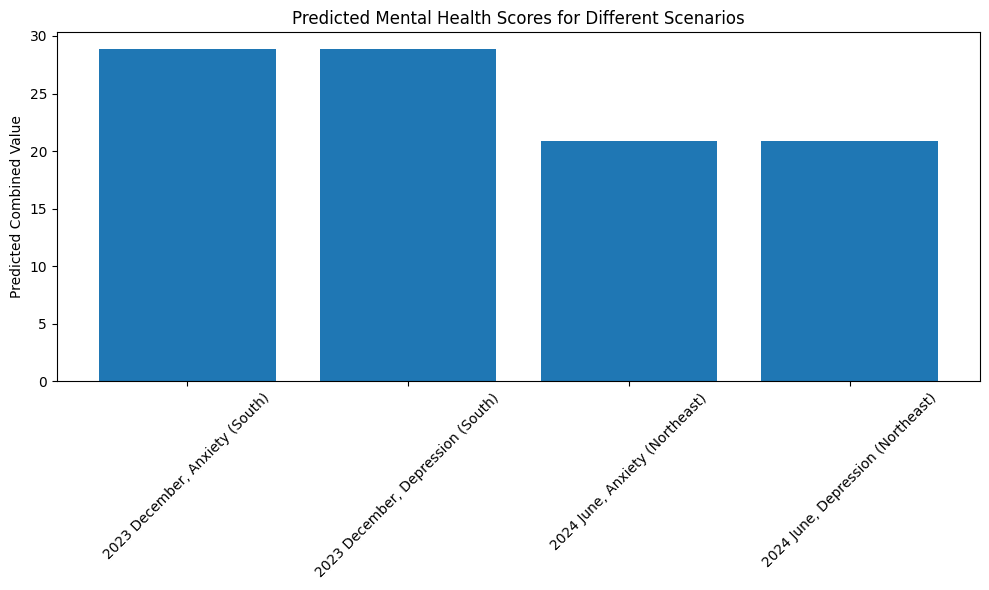

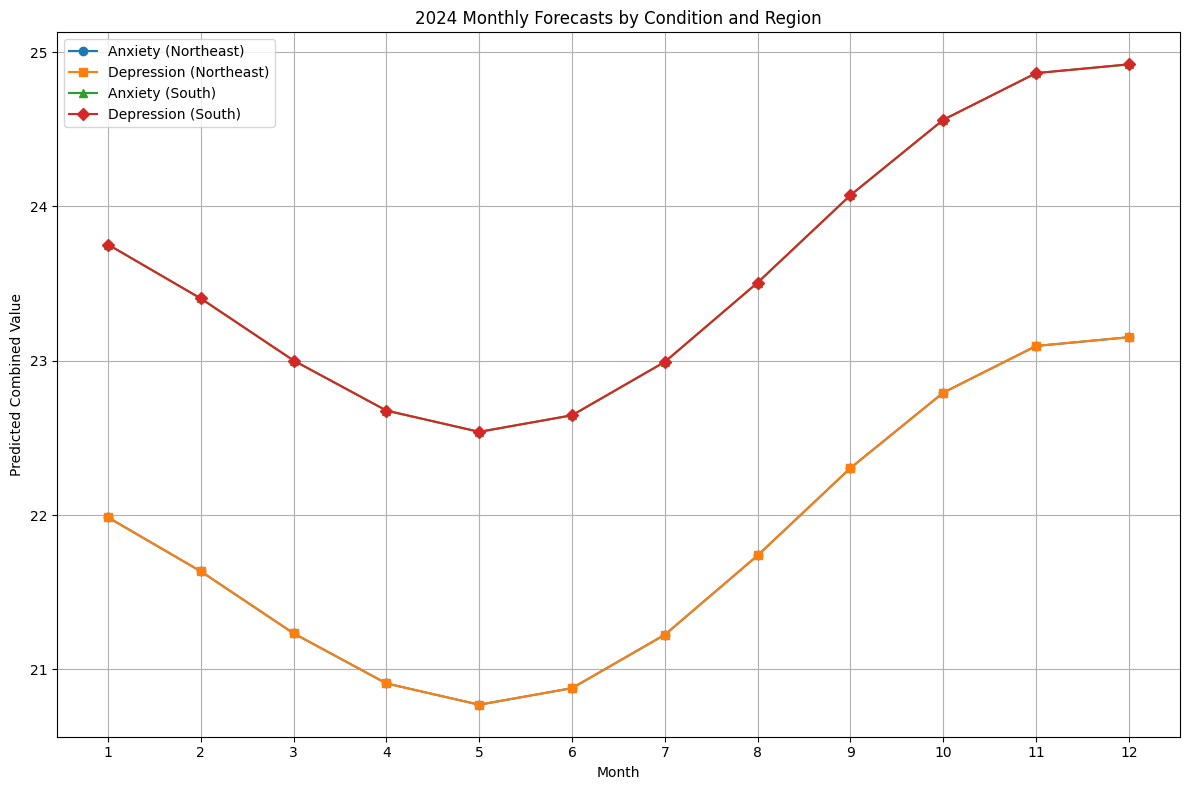

In [28]:
# Predict for an example scenario
# Create a sample data point for prediction
def create_example_data(year, month, is_anxiety=True, region='South'):
    # Create a DataFrame with one row
    example = pd.DataFrame({
        'Year': [year],
        'Month': [month],
        'Year_Squared': [year ** 2],
        'Sin_Month': [np.sin(2 * np.pi * month / 12)],
        'Cos_Month': [np.cos(2 * np.pi * month / 12)],
        'Year_Sin': [year * np.sin(2 * np.pi * month / 12)],
        'Year_Cos': [year * np.cos(2 * np.pi * month / 12)]
    })
    
    # Add indicator columns for Indicated_Anxiety
    for col in X_advanced.columns:
        if col.startswith('Indicated_'):
            example[col] = [1 if col == 'Indicated_Anxiety' and is_anxiety else 0]
        elif col.startswith('Region_'):
            example[col] = [1 if col == f'Region_{region}' else 0]
    
    # Ensure all columns from X_advanced are present
    for col in X_advanced.columns:
        if col not in example.columns:
            example[col] = 0
    
    # Reorder columns to match X_advanced
    example = example[X_advanced.columns]
    
    return example

# Create examples for different scenarios
example_2023_anxiety = create_example_data(2023, 12, is_anxiety=True, region='South')
example_2023_depression = create_example_data(2023, 12, is_anxiety=False, region='South')
example_2024_anxiety = create_example_data(2024, 6, is_anxiety=True, region='Northeast')
example_2024_depression = create_example_data(2024, 6, is_anxiety=False, region='Northeast')

# Make predictions
predictions = {
    '2023 December, Anxiety (South)': best_model.predict(example_2023_anxiety)[0],
    '2023 December, Depression (South)': best_model.predict(example_2023_depression)[0],
    '2024 June, Anxiety (Northeast)': best_model.predict(example_2024_anxiety)[0],
    '2024 June, Depression (Northeast)': best_model.predict(example_2024_depression)[0]
}

print("\nPredictions for Example Scenarios:")
for scenario, prediction in predictions.items():
    print(f"{scenario}: {prediction:.2f}")

# Visualize predictions
plt.figure(figsize=(10, 6))
plt.bar(predictions.keys(), predictions.values())
plt.xticks(rotation=45)
plt.title('Predicted Mental Health Scores for Different Scenarios')
plt.ylabel('Predicted Combined Value')
plt.tight_layout()
plt.show()

# Monthly forecasting for 2024
months_2024 = range(1, 13)
anxiety_northeast_2024 = [best_model.predict(create_example_data(2024, month, True, 'Northeast'))[0] 
                         for month in months_2024]
depression_northeast_2024 = [best_model.predict(create_example_data(2024, month, False, 'Northeast'))[0] 
                            for month in months_2024]
anxiety_south_2024 = [best_model.predict(create_example_data(2024, month, True, 'South'))[0] 
                     for month in months_2024]
depression_south_2024 = [best_model.predict(create_example_data(2024, month, False, 'South'))[0] 
                        for month in months_2024]

# Plot forecasts
plt.figure(figsize=(12, 8))
plt.plot(months_2024, anxiety_northeast_2024, 'o-', label='Anxiety (Northeast)')
plt.plot(months_2024, depression_northeast_2024, 's-', label='Depression (Northeast)')
plt.plot(months_2024, anxiety_south_2024, '^-', label='Anxiety (South)')
plt.plot(months_2024, depression_south_2024, 'D-', label='Depression (South)')
plt.title('2024 Monthly Forecasts by Condition and Region')
plt.xlabel('Month')
plt.ylabel('Predicted Combined Value')
plt.xticks(months_2024)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()